In [1]:
import pandas as pd
import numpy as np

importer les donnees du titanic et afficher les 5 premieres lignes

In [2]:
train = pd.read_csv('titanic_train.csv')
train.head().tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


faire l'inventaire des colonnes du dataframe en precisant les colonnes quantitatives et les qualitatives

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
dead = train[train['Survived']==0]
survived = train[train['Survived']==1]

identifier les valeurs manquantes et imputer les par le mode pour les variables qualitatives et la mediane pour les varialbes quantitatives

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

considerer les variables ['SibSp', 'Parch', 'Fare'] et mettre en place un modèle de regression logistique

In [6]:
#Convertir les int en object / Façon prof avec un tableau
def convert_int_to_object(df, cols_name):

    for cols in cols_name:
        df[cols] = df[cols].astype("object")
    return df
        
cols_name=['Survived','Pclass']
train = convert_int_to_object(train, cols_name)

train.isnull().sum()

creer la target qui est represente par la colonne survived
combien de personnes ont survecu
combien de femmes ont embarqué et combien ont survecu?

In [12]:
def getTitle(str):
    return str.split(',')[1].split('.')[0].strip()

train['Title'] = train['Name'].apply(lambda x : getTitle(x))
train['Surname'] = train['Name'].apply(lambda x : '(' in x)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,False


In [103]:
def input_missing_values(df):
    for col in df.columns:
        if (df[col].dtype == "float64") or (df[col].dtype == "int64"):
            df[col] = df[col].fillna(df[col].median())
        if (df[col].dtype == object):
            df[col] = df[col].fillna(df[col].mode()[0])

    return df
a = input_missing_values(train)

In [107]:
train.isnull().sum()


PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Title           0
Surname         0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Agebin         22
dtype: int64

### quick modelisation: logistics Regression 



In [18]:
def parse_model(X, use_columns):
    if "Survived" not in X.columns:
        raise ValueError("target column survived should belong to df")
    target = X["Survived"]
    X = X[use_columns]
    return X, target

model_cols1 =['SibSp', 'Parch', 'Pclass']
X, y = parse_model(X=train.copy(), use_columns=model_cols1)

##### Note: For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.

In [19]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

Reg_Log = LogisticRegression(random_state=42)
Reg_Log.fit(X_train, y_train)
ypred = Reg_Log.predict(X_test)

In [31]:
print('Score : ',(ypred==y_test).sum()/ypred.size)


Score :  0.7052238805970149


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77       157
           1       0.69      0.52      0.59       111

    accuracy                           0.71       268
   macro avg       0.70      0.68      0.68       268
weighted avg       0.70      0.71      0.70       268



In [33]:
train['Surname'] = train['Name'].apply(lambda x : '(' in x)
mask = train['Surname']==True
train.loc[mask, ["Name", "Surname"]]

,Name,Surname
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",True
9,"Nasser, Mrs. Nicholas (Adele Achem)",True
15,"Hewlett, Mrs. (Mary D Kingcome)",True
...,...,...
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",True
874,"Abelson, Mrs. Samuel (Hannah Wizosky)",True
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",True
880,"Shelley, Mrs. William (Imanita Parrish Hall)",True


### Etude des variables

In [34]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
%pylab inline


def plot_hist(feature, bins=20):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1, x2], label=["Victime", "Survivant"], bins=bins, color=['r', 'b'])
    plt.legend(loc="upper left")
    plt.title('distribution relative de %s' %feature)
    plt.show()


Populating the interactive namespace from numpy and matplotlib


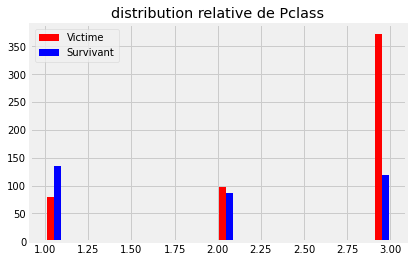

In [51]:
plot_hist('Pclass')

In [38]:
from sklearn import preprocessing
from sklearn import metrics

def dummify_features(df):
    """
    Transform categorical variables to dummy variables.

    Parameters
    ----------
    df: dataframe containing only categorical features

    Returns
    -------
    X: new dataframe with dummified features
       Each column name becomes the previous one + the modality of the feature

    enc: the OneHotEncoder that produced X (it's used later in the processing chain)
    """
    colnames = df.columns
    le_dict = {}
    for col in colnames:
        le_dict[col] = preprocessing.LabelEncoder()
        le_dict[col].fit(df[col])
        df.loc[:, col] = le_dict[col].transform(df[col])

    enc = preprocessing.OneHotEncoder()
    enc.fit(df)
    X = enc.transform(df)

    dummy_colnames = [cv + '_' + str(modality) for cv in colnames for modality in le_dict[cv].classes_]
    # for cv in colnames:
    #     for modality in le_dict[cv].classes_:
    #         dummy_colnames.append(cv + '_' + modality)

    return X, dummy_colnames, enc
to_dummify = ["Pclass"]
X_dummy, dummy_columns, dummy_encoder = dummify_features(train[to_dummify])
X_dummy = pd.DataFrame(X_dummy.toarray(), columns=dummy_columns)

C:\Users\ybett\anaconda3\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Mr,False,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss,False,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Mr,False,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,Rev,False,0.0,1.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,False,1.0,0.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,Miss,False,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,False,1.0,0.0,0.0


In [52]:
train = train.join(X_dummy,lsuffix='_caller', rsuffix='_other')

In [53]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,Mr,False,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,True,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,Miss,False,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,True,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,Mr,False,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,Rev,False,0.0,1.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,False,1.0,0.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S,Miss,False,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,False,1.0,0.0,0.0


In [166]:
train.loc[(train.Sex == "male", "Sex")]=1
train.loc[(train.Sex == "female", "Sex")]=0 #On remplace le sexe par un bool

C:\Users\ybett\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [190]:
train["Agebin"] = pd.cut(train["Age"],bins=[0,8,60,85], labels=[1,2,3]) #classes d'age
 
train['Agebin'].unique()

[2, 1, 3]
Categories (3, int64): [1 < 2 < 3]

In [412]:
def parse_model2(X, use_columns):
    if "Survived" not in X.columns:
        raise ValueError("target column survived should belong to df")
    target = X["Survived"]
    X = X[use_columns]
    return X, target

model_cols2 =['SibSp', 'Parch', 'Fare', 'Pclass','Sex','Agebin']
X2, y2 = parse_model2(X=train.copy(), use_columns=model_cols2)


In [439]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.3)

Reg_Log = LogisticRegression(random_state=42)

Reg_Log.fit(X_train2, y_train2)

ypred2 = Reg_Log.predict(X_test2)

In [440]:
score3 = Reg_Log.score(X_test2, y_test2)
score3

0.8283582089552238

In [171]:
print(classification_report(y_test2,ypred2))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.80      0.70      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [172]:
train['Title'].unique()

array([1., 3., 2., 4., 5., 0.])

In [159]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.318182
5,the Countess,1.000000


In [162]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train['Title'] = train['Title'].map(title_mapping)
train['Title'] = train['Title'].fillna(0)

In [441]:
model_cols2 =['SibSp', 'Parch', 'Fare', 'Pclass','Sex','Agebin','Title']
X2, y2 = parse_model2(X=train.copy(), use_columns=model_cols2)


In [452]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size=0.3)

Reg_Log = LogisticRegression(random_state=42)

Reg_Log.fit(X_train2, y_train2)

ypred2 = Reg_Log.predict(X_test2)

C:\Users\ybett\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [453]:
score3 = Reg_Log.score(X_test2, y_test2)
score3

0.832089552238806

In [476]:
from sklearn.ensemble import *
random_forest = RandomForestClassifier(n_estimators=300,criterion="gini",max_depth=20)
random_forest.fit(X_train2, y_train2)
Y_pred = random_forest.predict(X_test2)
random_forest.score(X_test2, y_test2)

0.8619402985074627

In [477]:
acc_random_forest = round(random_forest.score(X_test2, y_test2) * 100, 2)
acc_random_forest

86.19

In [319]:
print(X2.columns)

Index(['SibSp', 'Parch', 'Fare', 'Pclass', 'Sex', 'Agebin', 'Title'], dtype='object')


In [491]:
from sklearn.model_selection import GridSearchCV

Estimator = RandomForestClassifier(random_state=42)
parameters = {
    'n_estimators': [100,150,200,250,300],
    'max_depth': np.arange(6,16,2),
    'min_samples_split': np.arange(10,30,5),
    'min_samples_leaf': np.arange(5,20,5),
    'criterion': ["gini"]
}

model2 = GridSearchCV

# cross_val_score(estimator=Estimator, X=X_train, y=y_train, cv=5)
gd_sr = GridSearchCV(estimator=Estimator,
                     param_grid=parameters,
                     scoring='logloss',
                     cv=5,verbose=1,
                     n_jobs=-1)


In [492]:
gd_sr.fit(X_train2, y_train2)

ValueError: 'logloss' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [482]:
print(gd_sr.best_params_)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100}
0.8298193548387097


In [493]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [ ]:
- Faire la meme chose avec un modele ensembliste